In [ ]:
# Overall theme on how sports changed over time in relation to earnings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *
import statsmodels.formula.api as smf

In [2]:
df=pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df = df.rename(columns={'earnings ($ million)': 'earnings'})
df = df.rename(columns=lambda x: x.replace(' ', '_'))

df.loc[df['Sport'].str.contains('auto racing', case=False), 'Sport'] = 'NASCAR'
df.loc[df['Sport'].str.contains('f1', case=False), 'Sport'] = 'f1'

df.Sport=df.Sport.str.lower().replace('nba','basketball')

df.loc[df['Name']=='Deion Sanders','Sport'] = 'baseball'

df.columns = df.columns.str.lower()

df.head()

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,nascar,1990,10.0
4,5,Alain Prost,France,5,NaN,nascar,1990,9.0


In [3]:
print(df[51:54])

    s.no           name nationality  current_rank previous_year_rank  \
51    52     Mike Tyson         USA             2         not ranked   
52    53  Deion Sanders         USA             3                 38   
53    54   Riddick Bowe         USA             4         not ranked   

       sport  year  earnings  
51    boxing  1995      40.0  
52  baseball  1995      22.5  
53    boxing  1995      22.2  


In [6]:
df.sport.unique()

array(['boxing', 'nascar', 'golf', 'basketball', 'tennis', 'nfl',
       'baseball', 'ice hockey', 'american football / baseball', 'f1',
       'hockey', 'american football', 'soccer', 'cycling',
       'motorcycle gp', 'mma'], dtype=object)

In [ ]:
#--------------------------------------------------------------------------------#

In [24]:
df_no1['nationality'].unique()

array(['USA', 'Argentina', 'Switzerland', 'Portugal', 'Germany'],
      dtype=object)

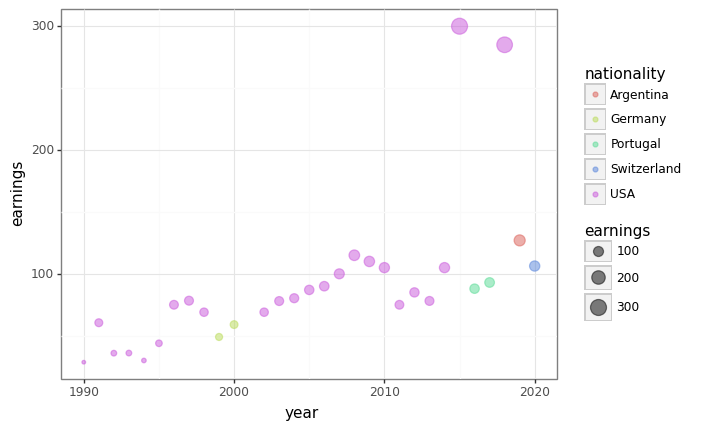

<ggplot: (8781077460206)>

In [25]:
(ggplot(df_no1, mapping=aes(x='year', y='earnings',color='nationality',size='earnings'))+
geom_point(alpha = 0.5)+
theme_bw()
)

In [ ]:
# From this visualization, we can see that the majority of No.1 ranked athletes from 1990 to 2020 are from USA. 
# According to the dataset, No.1 players are only from 5 countries, as indicated above. 

In [ ]:
# In this section, we will perform some data analysis on specific sport in comparison to the dataset

In [41]:
df_basketball = df[df["sport"] == "basketball"]
df_basketball.head()

,s.no,name,nationality,current_rank,previous_year_rank,sport,year,earnings
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
12,13,Michael Jordan,USA,3,8,basketball,1991,16.0
20,21,Michael Jordan,USA,1,3,basketball,1992,35.9
30,31,Michael Jordan,USA,1,1,basketball,1993,36.0
35,36,Shaquille O'Neal,USA,6,>40,basketball,1993,15.2


In [42]:
df_basketball.describe()

,s.no,current_rank,year,earnings
count,82.000000,82.000000,82.000000,82.000000
mean,157.975610,5.573171,2005.853659,41.869512
std,80.728164,2.624813,8.341658,20.200071
min,8.000000,1.000000,1990.000000,8.100000
25%,97.750000,3.250000,1999.000000,26.025000
50%,148.000000,6.000000,2005.000000,36.000000
75%,224.750000,7.750000,2013.000000,53.000000
max,298.000000,10.000000,2020.000000,89.000000


In [43]:
df_basketball['name'].unique()

array(['Michael Jordan', "Shaquille O'Neal", "Shaq O'Neal",
       'Dennis Rodman', 'Patrick Ewing', 'Grant Hill', 'Kevin Garnett',
       'Kobe Bryant', 'LeBron James', 'Kevin Durant', 'Stephen Curry',
       'James Harden'], dtype=object)

In [50]:
basketball_earnings = df_basketball.groupby("name")["earnings"].sum().reset_index()
print(basketball_earnings)

                name  earnings
0      Dennis Rodman      12.9
1         Grant Hill     137.1
2       James Harden      46.6
3       Kevin Durant     300.3
4      Kevin Garnett     101.7
5        Kobe Bryant     601.1
6       LeBron James     844.8
7     Michael Jordan     738.8
8      Patrick Ewing      31.2
9        Shaq O'Neal     102.2
10  Shaquille O'Neal     238.2
11     Stephen Curry     278.4


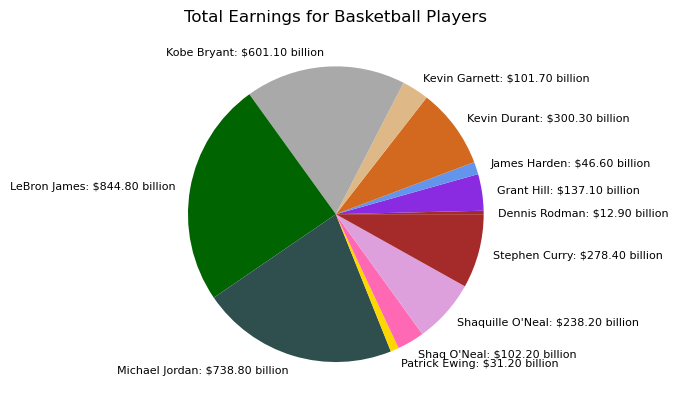

In [61]:
colors = ["#A52A2A", "#8A2BE2", "#6495ED", "#D2691E", "#DEB887",
          "#A9A9A9", "#006400", "#2F4F4F", "#FFD700", "#FF69B4", "#DDA0DD"]

labels = [f"{name}: ${earnings:.2f} billion" 
          for name, earnings in zip(basketball_earnings["name"], 
                                    basketball_earnings["earnings"])]
plt.pie(basketball_earnings["earnings"], labels=labels,
       colors=colors, textprops={"fontsize": 8})
plt.title("Total Earnings for Basketball Players")
plt.show()